In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Load data

In [3]:
mdb_data = pd.read_csv("./dataset/mdb_prices.csv")

In [4]:
mdb_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,0.0,0.0
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.0,0.0
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.0,0.0
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.0,0.0
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,0.0,0.0
...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,0.0,0.0
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.0,0.0
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,0.0,0.0
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.0,0.0


In [5]:
mdb_data['Dividends'].unique()
mdb_data['Stock Splits'].unique()
mdb = mdb_data.drop(['Dividends', 'Stock Splits'], axis=1)

In [6]:
mdb['Log Returns'] = np.log(mdb['Close'] / mdb['Close'].shift(1))

In [7]:
# Garman-Klass volatility estimator
mdb['Intraday Volatility'] = 0.5 * (np.log(mdb['High'] / mdb['Low']) ** 2) - 0.386 * (np.log(mdb['Close'] / mdb['Open']) ** 2)

In [8]:
mdb['Range'] = mdb['High'] - mdb['Low']

In [9]:
mdb

,Date,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,NaN,0.000689,10.789978
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.020450,0.000262,6.829987
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.010142,0.000969,12.410004
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.008945,0.000512,9.120026
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,-0.010551,0.005620,30.750000
...,...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,-0.016656,0.000125,6.799988
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.018524,0.000136,5.734985
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,-0.010586,0.000974,14.661011
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.200765,0.001137,19.989990


<Axes: title={'center': 'Log Returns over 5 years for $MDB'}, xlabel='Date'>

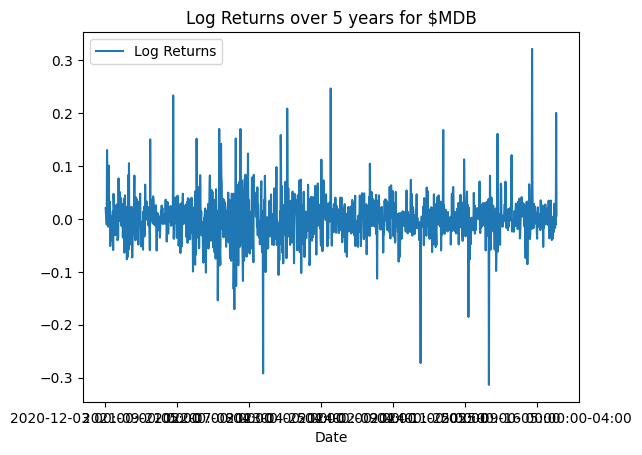

In [10]:
mdb.plot(x='Date', y=['Log Returns'], kind='line', title='Log Returns over 5 years for $MDB')

In [11]:
# EMA
# 10-day EMA
mdb['EMA-10day'] = mdb['Close'].ewm(span=10, adjust=False).mean()

In [12]:
mdb

,Date,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range,EMA-10day
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,NaN,0.000689,10.789978,272.010010
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.020450,0.000262,6.829987,273.031827
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.010142,0.000969,12.410004,274.382402
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.008945,0.000512,9.120026,275.945604
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,-0.010551,0.005620,30.750000,276.684587
...,...,...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,-0.016656,0.000125,6.799988,335.458495
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.018524,0.000136,5.734985,334.896950
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,-0.010586,0.000974,14.661011,333.801140
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.200765,0.001137,19.989990,346.199113


In [ ]:
mdb['Date'] = pd.to_datetime(mdb['Date']).normalize()
mdb

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 68

In [ ]:
today = pd.Timestamp.today()
today

Timestamp('2025-12-03 16:36:32.832770')

In [ ]:
start_date = today - pd.Timedelta(days=30)
start_date

Timestamp('2025-11-03 16:36:32.832770')

In [ ]:
last_30_days_mdb = mdb[mdb['Date'] >= start_date]
last_30_days_mdb.plot(x='Date', y=['Close', 'EMA-10day'], kind='line', title='Close & 10-day EMA for $MDB')

TypeError: Cannot compare tz-naive and tz-aware timestamps

In [ ]:
states = ['bull', 'bear', 'rebound']

"""
States:
    bull: low-vol, positive mean
    bear: high-vol, negative mean
    rebound: high-vol, positive mean
"""

## Feature Engineering